<a href="https://colab.research.google.com/github/leethanhvaan20302/A.I.-Artificial-Intelligence/blob/main/Agricultural%20Product%20Quality%20%20Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import các thư viện cần thiết, bao gồm: Keras, numpy, matplotlib, và os.
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Di chuyển tới thư mục data
%cd /content/drive/MyDrive/Data_Colab/folder_ai

/content/drive/MyDrive/Data_Colab/folder_ai


In [ ]:
# Khởi tạo dữ liệu cho quá trình training và validation bằng cách sử dụng
"""Sử dụng lớp ImageDataGenerator để tiền xử lý dữ liệu ảnh. 
Hàm rescale=1./255 giúp chia giá trị của các pixel trong ảnh cho 255 để đưa giá trị về khoảng [0,1]. shear_range, zoom_range 
và horizontal_flip là các thuộc tính khác của lớp ImageDataGenerator giúp tăng tính đa dạng của dữ liệu.

Khởi tạo training data và validation data bằng phương thức flow_from_directory của lớp ImageDataGenerator. 
Tham số target_size là kích thước của ảnh sau khi được resize về cùng kích thước, 
batch_size là số lượng ảnh được truyền vào mô hình mỗi lần tính toán,
và class_mode='categorical' là chế độ phân loại đa lớp cho mô hình."""

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Colab/folder_ai/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Data_Colab/folder_ai/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 4045 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [ ]:
# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices

{'data1': 0, 'data2': 1, 'data3': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
"""Tạo model CNN bằng cách sử dụng lớp Conv2D để thêm các layer convolution, lớp MaxPooling2D để giảm chiều của ảnh,
 lớp Flatten để chuyển đổi dữ liệu ảnh thành một vector 1D, lớp Dense để thêm các layer fully connected, và lớp Dropout để tránh overfitting."""
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
# Biên dịch model bằng cách sử dụng hàm compile, với các tham số như: optimizer, loss, và metrics.

model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()
# Tiến hành quá trình training model bằng cách sử dụng hàm fit.
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)
     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

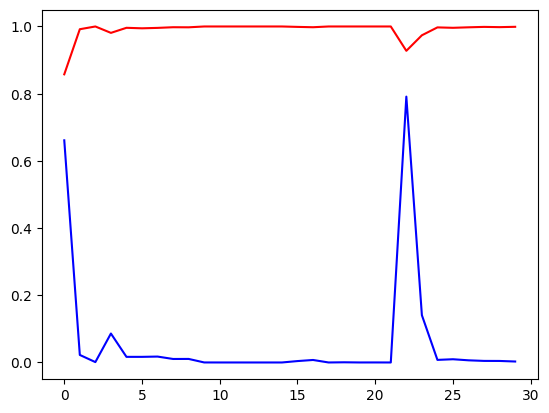

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()


In [ ]:
# Lưu 
from google.colab import drive
model.save('/content/drive/MyDrive/Save ModelS/XoaiModel.h5')

In [4]:
# Load model đã lưu bằng hàm load_model.
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Save ModelS/XoaiModel.h5')

1/1 [==============================] - 0s 20ms/step
Xoài loại 3


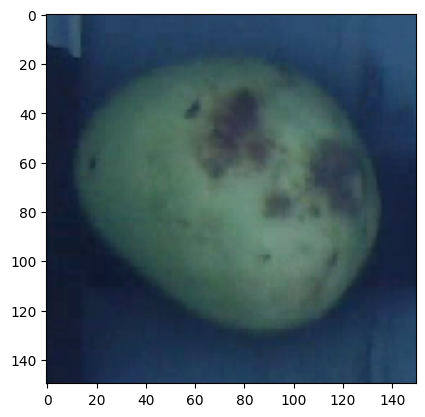

1/1 [==============================] - 0s 27ms/step
Xoài loại 3


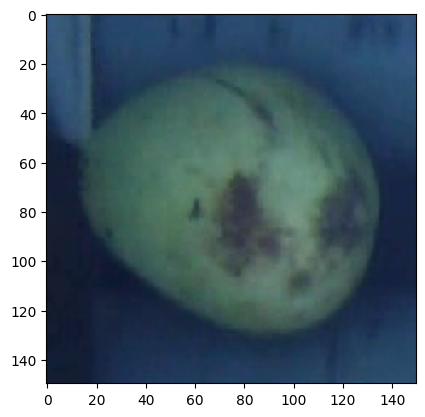

1/1 [==============================] - 0s 35ms/step
Xoài loại 3


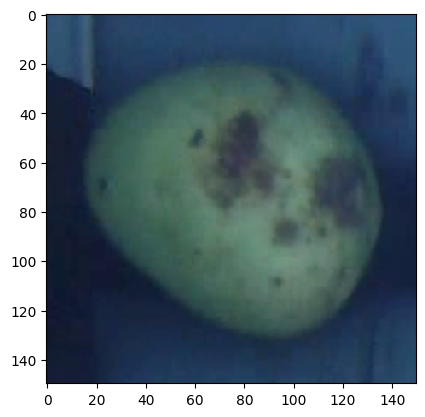

1/1 [==============================] - 0s 34ms/step
Xoài loại 3


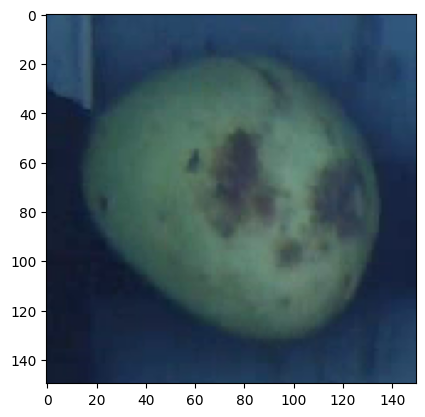

1/1 [==============================] - 0s 30ms/step
Xoài loại 3


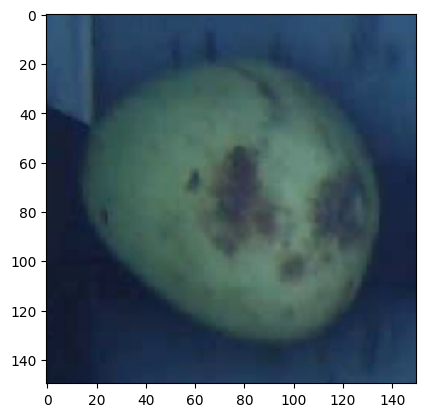

1/1 [==============================] - 0s 21ms/step
Xoài loại 1


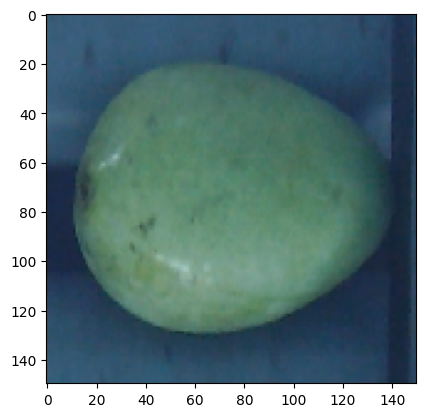

1/1 [==============================] - 0s 19ms/step
Xoài loại 1


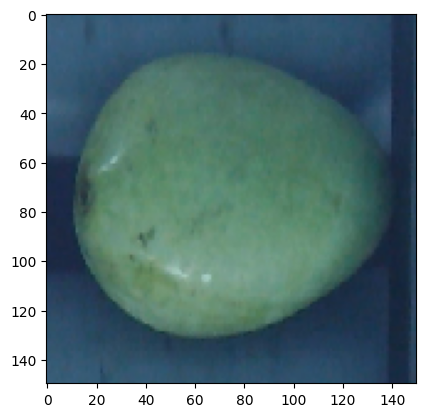

1/1 [==============================] - 0s 20ms/step
Xoài loại 1


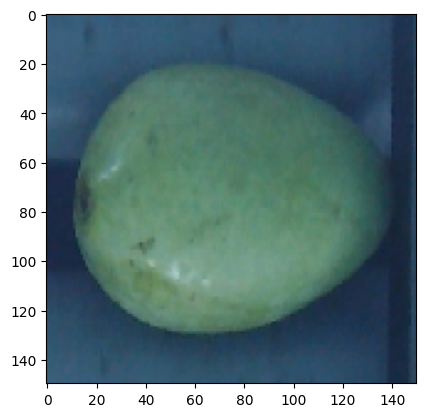

1/1 [==============================] - 0s 30ms/step
Xoài loại 2


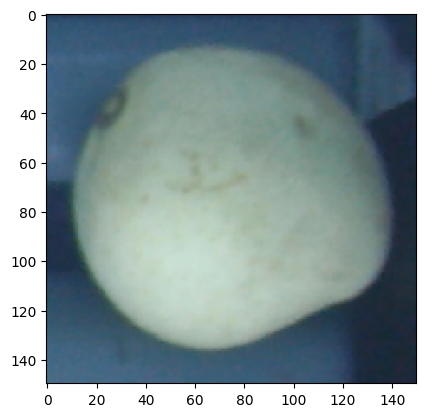

1/1 [==============================] - 0s 20ms/step
Xoài loại 1


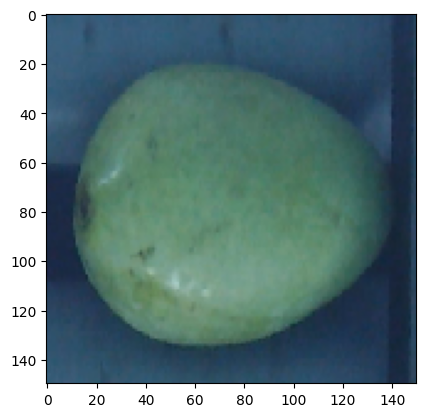

1/1 [==============================] - 0s 29ms/step
Xoài loại 1


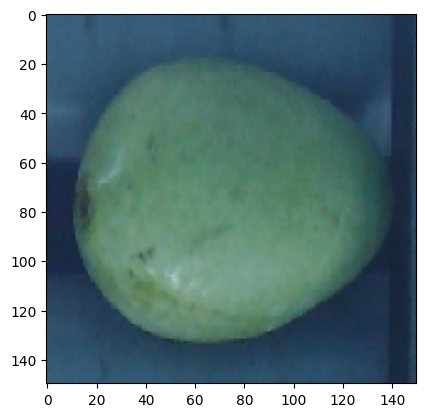

1/1 [==============================] - 0s 20ms/step
Xoài loại 2


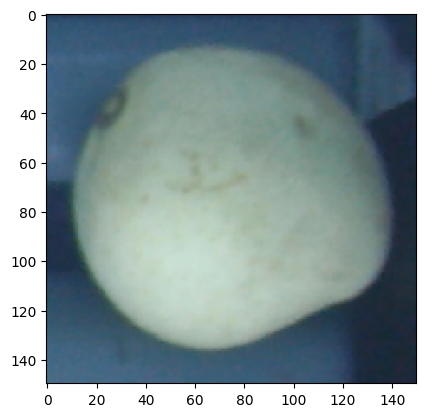

1/1 [==============================] - 0s 20ms/step
Xoài loại 2


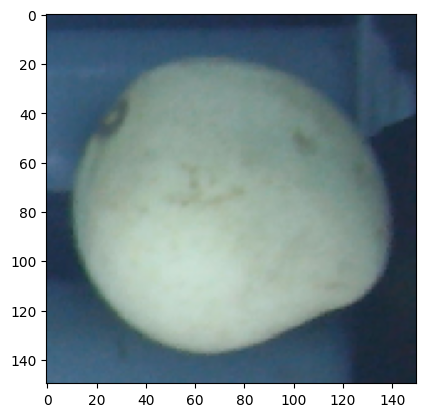

1/1 [==============================] - 0s 20ms/step
Xoài loại 2


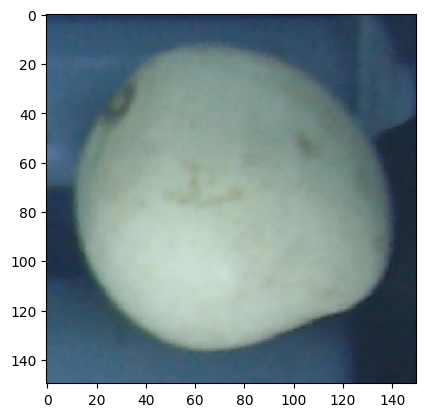

1/1 [==============================] - 0s 21ms/step
Xoài loại 2


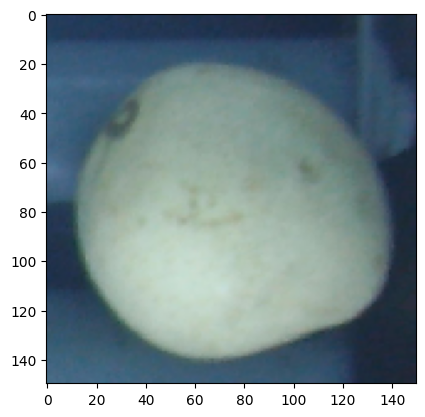

In [ ]:
# Chạy thử kết quả
test="/content/drive/MyDrive/Data_Colab/folder_ai/testModel"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Xoài loại 1','Xoài loại 2','Xoài loại 3']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 66ms/step


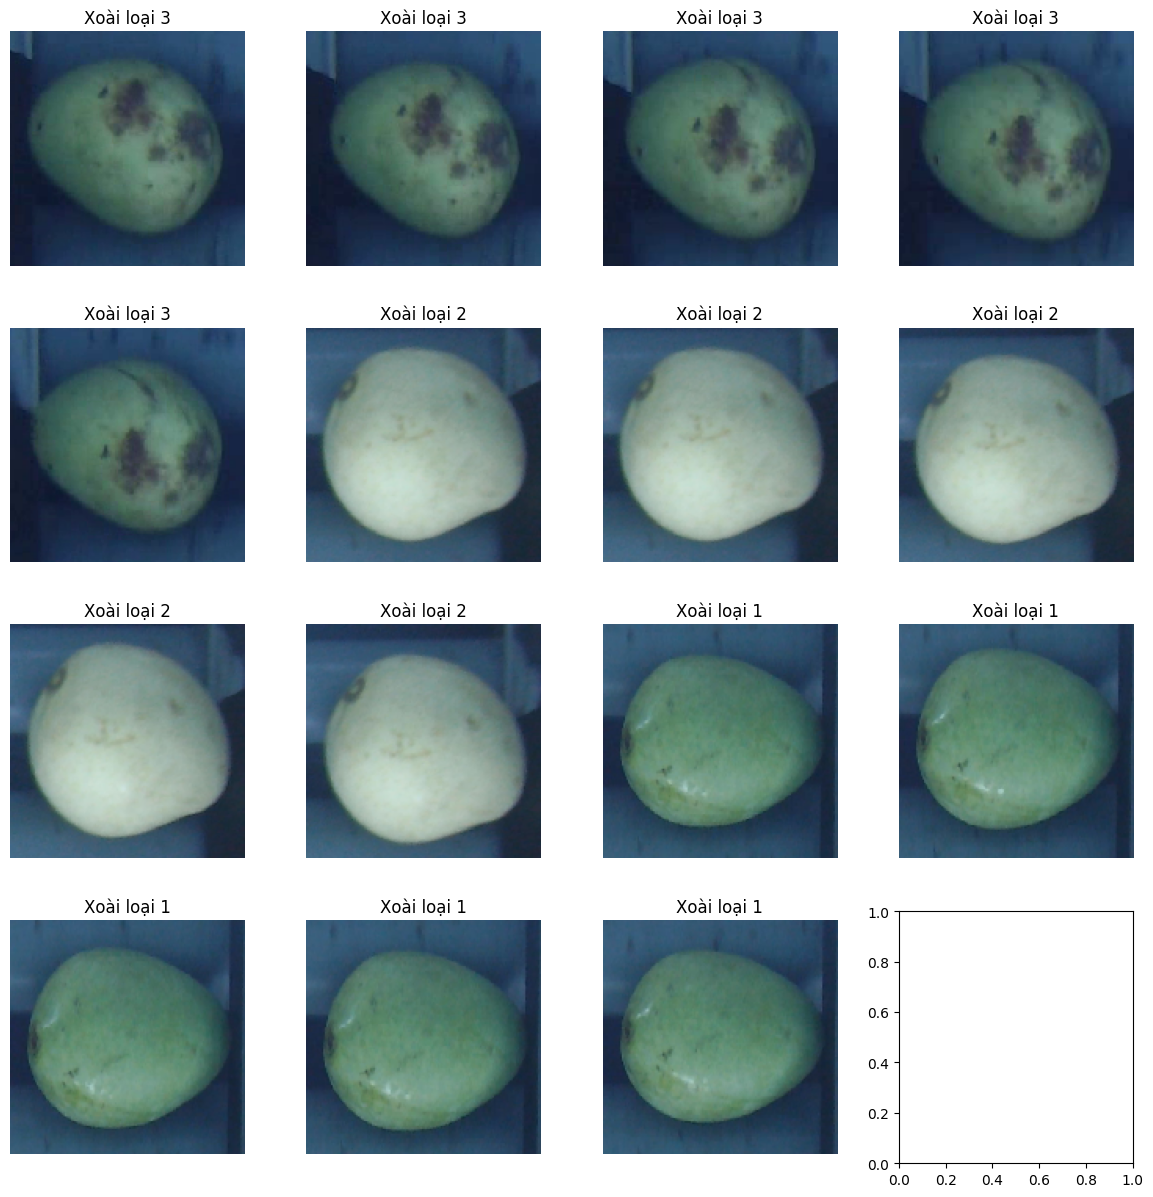

In [9]:
import matplotlib.pyplot as plt

test = "/content/drive/MyDrive/Data_Colab/folder_ai/testModel"

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
fig.tight_layout()

for i, filename in enumerate(listdir(test)):
    if i >= 16:
        break

    row = i // 4
    col = i % 4

    img_path = test + '/' + filename
    img = load_img(img_path, target_size=(150, 150))
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    img = img_to_array(img)
    img = img.astype('float32')
    img = img / 255
    img = np.expand_dims(img, axis=0)
    result = model_1.predict(img).argmax()
    class_name = ['Xoài loại 1', 'Xoài loại 2', 'Xoài loại 3']
    label = class_name[result]
    axes[row, col].set_title(label)

plt.show()
